In [132]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

Kode diatas digunakan untuk import library.

Kode dibawah digunakan untuk inisialisasi gambar dan menampilkannya

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

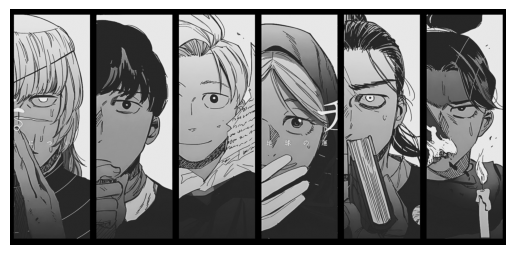

In [133]:
aktivisV0 = cv2.imread('aktivis.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(aktivisV0, cmap='gray')
plt.axis('off')

Kode dibawah digunakan untuk membagi sebuah gambar menjadi enam bagian. potongan gambar tersebut diambil dari kolom kolom tertentu, Misalnya potongan pertama yang diberi nama Badeni diambil dari kolom ke 4 hingga sebelum kolom ke 457. kemudian hasilnya ditampilkan

(np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5))

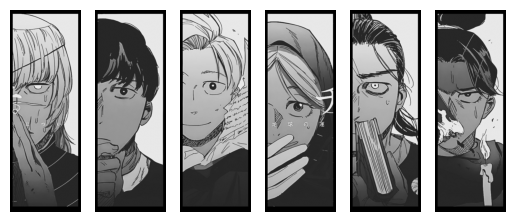

In [134]:
Badeni = aktivisV0[:, 4:457]
Albert = aktivisV0[:, 457:910]
Rafal = aktivisV0[:, 910:1363]
Jolenta = aktivisV0[:, 1363:1816]
Oczy = aktivisV0[:, 1816:2269]
Draka = aktivisV0[:, 2269:2722]
plt.subplot(1, 6, 1)
plt.imshow(Badeni,  cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(Albert,  cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(Rafal,  cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(Jolenta,  cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(Oczy,  cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(Draka,  cmap='gray')
plt.axis('off')

Kode dibawah digunakan untuk menggabungkan kembali enam potongan gambar yang sebelumnya telah dipisahkan. Fungsi merge menerima enam gambar serta sebuah daftar bernama urutan yang menunjukkan susunan penggabungan berdasarkan indeks gambar. Keenam gambar dimasukkan ke dalam sebuah list allPart. Kemudian, dibuat sebuah array kosong gabungan yang ukurannya disesuaikan dengan tinggi gambar dan lebar total dari semua gambar yang akan digabung. Proses penggabungan dilakukan dengan mengisi gabungan secara berurutan, sesuai urutan yang diberikan. Setelah penggabungan selesai, gambar hasil akhir ditampilkan.

(np.float64(-0.5), np.float64(2717.5), np.float64(1293.5), np.float64(-0.5))

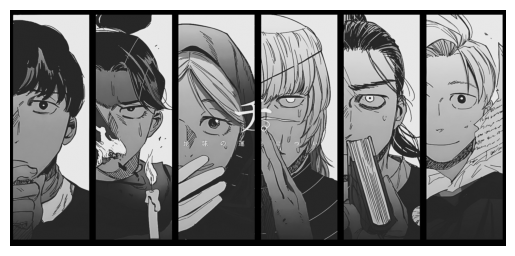

In [135]:
def merge(img1, img2, img3, img4, img5, img6, urutan):
    allPart = [None, img1, img2, img3, img4, img5, img6]
    height = img1.shape[0]
    column = sum(allPart[i].shape[1] for i in urutan)

    gabungan = np.zeros((height, column), dtype=img1.dtype)

    columnIni = 0
    for i in urutan:
        part = allPart[i]
        width = part.shape[1]
        gabungan[:, columnIni:columnIni+width] = part
        columnIni += width

    return  gabungan

aktivis = merge(Badeni, Albert, Rafal, Jolenta, Oczy, Draka, [2, 6, 4, 1, 5, 3])
plt.imshow(aktivis, cmap='gray')
plt.axis('off')

Kode di bawah ini berfungsi untuk melakukan ekualisasi histogram pada sebuah citra grayscale. Di awal fungsi, dicek apakah parameter image bernilai None sebagai bentuk validasi. Jika citra tidak tersedia, maka fungsi akan mengeluarkan pesan dan berhenti. Setelah itu, ukuran gambar diambil untuk mendapatkan jumlah total piksel. Histogram citra dihitung dengan menelusuri setiap piksel dan mencatat seberapa sering setiap nilai intensitas (0 hingga 255) muncul. Berdasarkan histogram ini, dihitung PDF (Probability Density Function), yaitu probabilitas kemunculan setiap tingkat intensitas terhadap total piksel. Langkah selanjutnya adalah membentuk CDF (Cumulative Distribution Function) dengan menjumlahkan nilai-nilai PDF secara kumulatif. CDF tersebut kemudian dinormalisasi dan dikalikan 255 untuk membentuk peta transformasi atau mapping intensitas baru yang merata. Mapping tersebut diterapkan ke seluruh piksel dalam citra, menghasilkan gambar baru dengan distribusi intensitas yang telah diekualisasi. Kemudian menghitung histogram dari kedua citra asli dan citra setelah diekualisasi. Pertama, ukuran citra diambil dengan mengakses atribut .shape, yang kemudian disimpan ke dalam variabel height dan width serta height2 dan width2. Sebuah array hist dengan panjang 256 diinisialisasi dengan nilai nol untuk mewakili jumlah kemunculan tiap nilai intensitas piksel dari 0 hingga 255. Selanjutnya, dilakukan dua perulangan bersarang untuk menelusuri setiap piksel pada gambar. Setiap kali sebuah nilai intensitas ditemukan, nilainya digunakan sebagai indeks untuk menambah satu ke dalam array histogram, sehingga menghasilkan jumlah frekuensi kemunculan masing-masing tingkat intensitas. Setelah itu hasil dari semua proses tersebut ditampilkan.

Nilai intensitas dari histogram citra setelah ekualisasi lebih merata dibandingkan histogram citra asli.

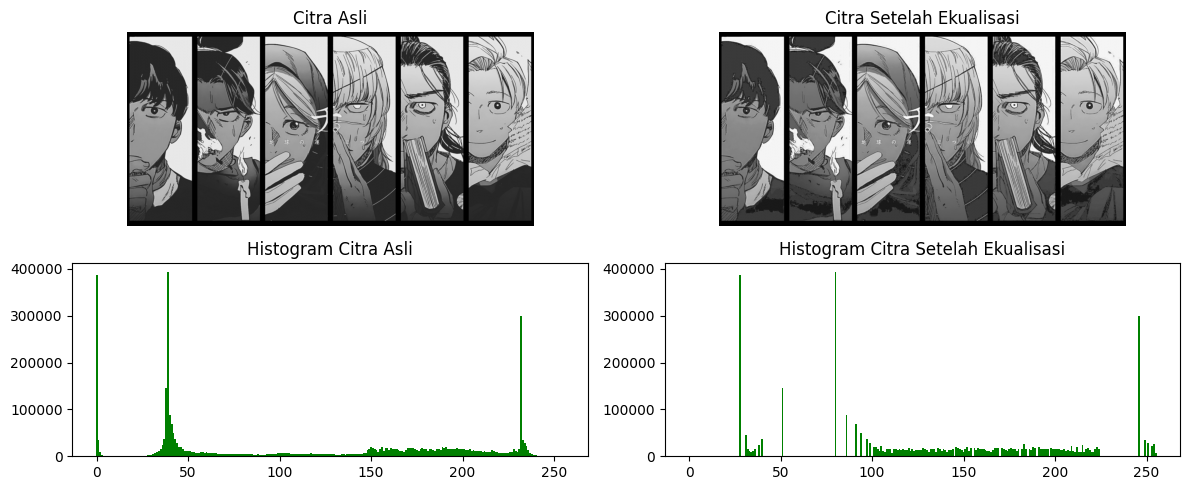

In [136]:
def ekualisasi(image):
    
    if image is None:
        print("Gambar tidak ditemukan.")
        return
    
    tinggi, lebar = image.shape
    totalPixels = tinggi * lebar

    histogram = np.zeros(256, dtype=int)
    for i in range(tinggi):
        for j in range(lebar):
            intensitas = image[i][j]
            histogram[intensitas] += 1

    pdf = [histogram[i] / totalPixels for i in range(256)]

    cdf = [0] * 256
    total = 0
    for i in range(256):
        total += pdf[i]
        cdf[i] = total

    mapping = [round(cdf[i] * 255) for i in range(256)]

    result = np.zeros_like(image)
    for i in range(tinggi):
        for j in range(lebar):
            result[i][j] = mapping[image[i][j]]

    height = image.shape[0]
    width = image.shape[1]
    hist = np.zeros(256, dtype=int)
    for i in range(height):
        for j in range(width):
            intensity = image[i][j]
            hist[intensity] += 1

    height2 = result.shape[0]
    width2 = result.shape[1]
    hist2 = np.zeros(256, dtype=int)
    for i in range(height2):
        for j in range(width2):
            intensity = result[i][j]
            hist2[intensity] += 1

    plt.figure(figsize=(12, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title('Citra Setelah Ekualisasi')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.bar([i for i in range(256)], hist, width=1.0, color='green')
    plt.title('Histogram Citra Asli')

    plt.subplot(2, 2, 4)
    plt.bar([i for i in range(256)], hist2, width=1.0, color='green')
    plt.title('Histogram Citra Setelah Ekualisasi')

    plt.tight_layout()
    plt.show()

ekualResult = ekualisasi(aktivis)

Kode dibawah digunakan untuk inisialisasi gambar dan menampilkannya

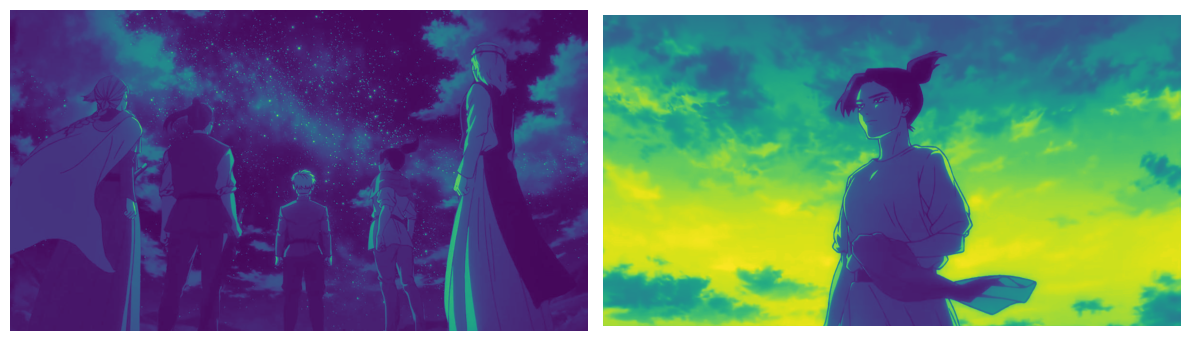

In [137]:
propaganda = cv2.imread('propaganda.jpg', cv2.IMREAD_GRAYSCALE)
draka = cv2.imread('draka.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(propaganda)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(draka)
plt.axis('off')

plt.tight_layout()

Kode dibawah merupakan kode untuk spesifikasi histogram. Histogram dari kedua citra dihitung dengan menjumlahkan jumlah kemunculan tiap intensitas piksel dari 0 hingga 255. Dari histogram tersebut, kode menghitung distribusi probabilitas (PDF) dan distribusi kumulatif (CDF) untuk masing-masing citra. Kemudian, dibentuk sebuah mapping atau pemetaan nilai intensitas dari citra asal ke citra target berdasarkan kedekatan nilai CDF-nya, sehingga intensitas pada citra asal disesuaikan agar menyerupai distribusi intensitas pada citra target. Hasil akhir dari pemetaan ini diterapkan pada citra asal untuk menghasilkan citra baru. Kemudian ditampilkan

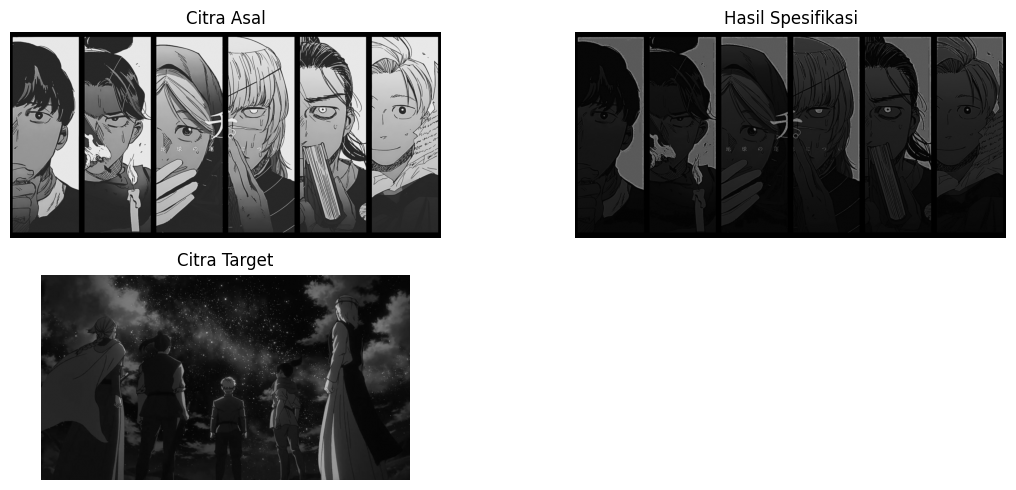

In [138]:
def spesifikasi(imageAsal, imageTarget):
    height, width = imageAsal.shape
    totalPixelsAsal = height * width

    height2, width2 = imageTarget.shape
    totalPixelsTarget = height2 * width2

    histAsal = np.zeros(256, dtype=int)
    for i in range(height):
        for j in range(width):
            histAsal[imageAsal[i][j]] += 1

    histTarget = np.zeros(256, dtype=int)
    for i in range(height2):
        for j in range(width2):
            histTarget[imageTarget[i][j]] += 1

    pdfAsal = [h / totalPixelsAsal for h in histAsal]
    pdfTarget = [h / totalPixelsTarget for h in histTarget]

    cdfAsal = [0] * 256
    cdfTarget = [0] * 256
    totalAwal, totalTarget = 0, 0
    for i in range(256):
        totalAwal += pdfAsal[i]
        totalTarget += pdfTarget[i]
        cdfAsal[i] = totalAwal
        cdfTarget[i] = totalTarget

    mapping = [0] * 256
    for i in range(256):
        minDiff = 1.0
        for j in range(256):
            diff = abs(cdfAsal[i] - cdfTarget[j])
            if diff < minDiff:
                minDiff = diff
                mapping[i] = j

    result = np.zeros_like(imageAsal)
    for i in range(height):
        for j in range(width):
            result[i][j] = mapping[imageAsal[i][j]]

    return result 

spesResultProp = spesifikasi(aktivis, propaganda)

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.imshow(aktivis, cmap='gray')
plt.title('Citra Asal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(spesResultProp, cmap='gray')
plt.title('Hasil Spesifikasi')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(propaganda, cmap='gray')
plt.title('Citra Target')
plt.axis('off')

plt.tight_layout()
plt.show()

Kode di bawah digunakan untuk memanggil fungsi spesifikasi.

Setelah proses spesifikasi histogram, citra awal berubah karena nilai-nilai intensitas pikselnya disesuaikan agar distribusinya mendekati distribusi histogram citra target. Setiap tingkat kecerahan pada gambar awal dipetakan ulang ke tingkat kecerahan baru berdasarkan hubungan kumulatif antara histogram gambar awal dan histogram target. Sehingga, tampilan visual gambar hasil bisa mengalami perubahan pada pencahayaan atau kontras, sehingga karakteristiknya menjadi lebih serupa dengan gambar target.

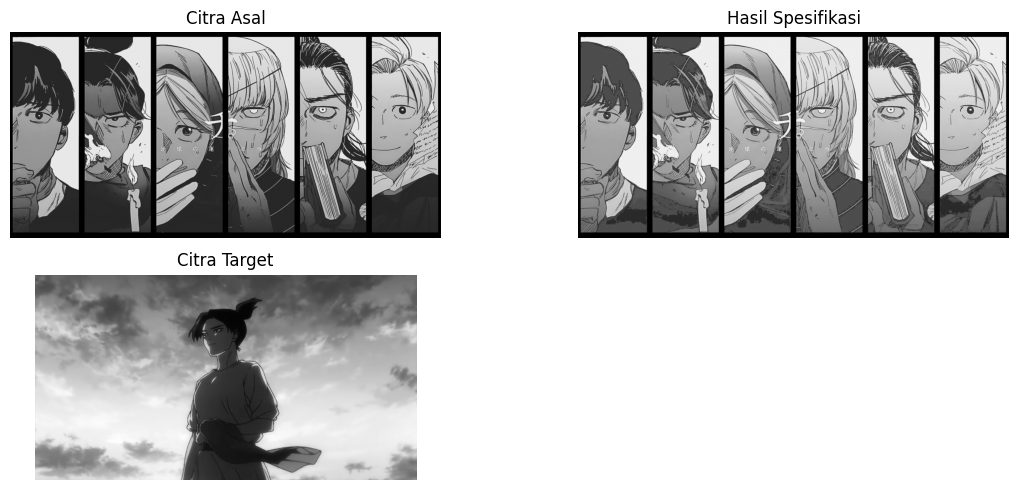

In [139]:
spesResultDraka = spesifikasi(aktivis, draka)

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.imshow(aktivis, cmap='gray')
plt.title('Citra Asal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(spesResultDraka, cmap='gray')
plt.title('Hasil Spesifikasi')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(draka, cmap='gray')
plt.title('Citra Target')
plt.axis('off')

plt.tight_layout()
plt.show()

Kode di bawah digunakan untuk membuat sebuah citra baru bernama aktivisV2, yang awalnya diisi dengan salinan dari spesResultDraka, yaitu hasil spesifikasi histogram antara gambar aktivis dan draka. Setelah itu, beberapa bagian tertentu dari aktivisV2 diganti menggunakan potongan-potongan dari spesResultProp, yaitu hasil spesifikasi antara aktivis dan propaganda. Potongan pertama yang diganti adalah area antara baris 490 sampai 610 dan kolom 460 sampai 920. Kemudian seluruh kolom dari 910 sampai 1360 di seluruh baris diganti, disusul dengan potongan dari baris 750 sampai 870 dan kolom 1340 sampai 2285, dan terakhir seluruh kolom dari 2270 hingga akhir citra juga diganti. Setelah penggantian itu selesai, gambar aktivisV2 ditampilkan.

(np.float64(-0.5), np.float64(2717.5), np.float64(1293.5), np.float64(-0.5))

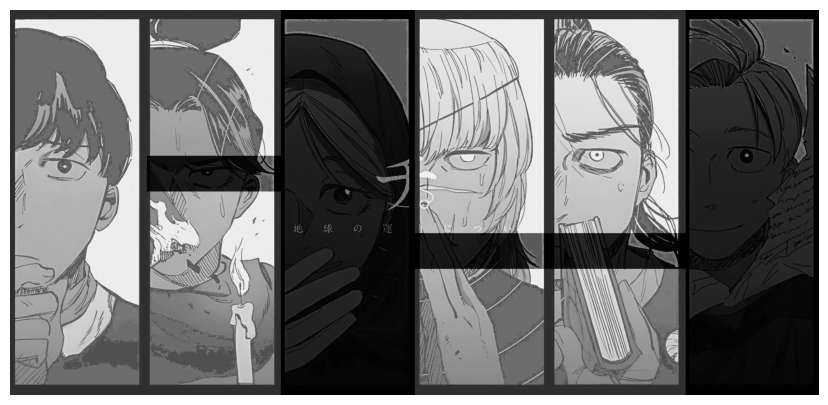

In [140]:
aktivisV2 = spesResultDraka
aktivisV2[490:610, 460:920] = spesResultProp[490:610, 460:920]
aktivisV2[:, 910:1360] = spesResultProp[:, 910:1360]
aktivisV2[750:870, 1340:2285] = spesResultProp[750:870, 1340:2285]
aktivisV2[:, 2270:] = spesResultProp[:, 2270:]

plt.figure(figsize=(12, 5))
plt.imshow(aktivisV2, cmap="gray")
plt.axis('off')

Kode dibawah melakukan spesifikasi pada gambar setiap aktivis kemudian disatukan menggunakan fungsi merge dan ditampilkan

(np.float64(-0.5), np.float64(2717.5), np.float64(1293.5), np.float64(-0.5))

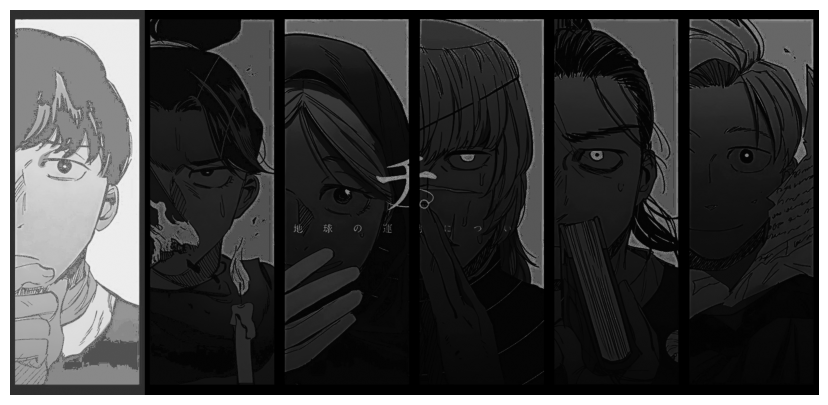

In [141]:
AlbertV3 = spesifikasi(Albert, draka)
BadeniV3 = spesifikasi(Badeni, propaganda)
RafalV3 = spesifikasi(Rafal, propaganda)
JolentaV3 = spesifikasi(Jolenta, propaganda)
OczyV3 = spesifikasi(Oczy, propaganda)
DrakaV3 = spesifikasi(Draka, propaganda)

aktivisV3 = merge(BadeniV3, AlbertV3, RafalV3, JolentaV3, OczyV3, DrakaV3, [2, 6, 4, 1, 5, 3])
plt.figure(figsize=(12, 5))
plt.imshow(aktivisV3, cmap='gray')
plt.axis('off')